In [1]:
import nltk
import nltk.tokenize

nltk.download('punkt', quiet=True)

True

In [2]:
import os
documents = []
titles = []
path = 'OneDrive/Desktop/comptext/'
with os.scandir(path) as entries:
    for entry in entries:
        print(entry.name)
        f = open(f'{path}\{entry.name}',encoding='utf-8')
        text = f.read()
        documents.append(text)
        titles.append(entry.name)
print(titles[1])
print(documents[1][0:100])

deathstranding.txt
godofwar.txt
stickoftruth.txt
godofwar.txt
Boy: I found some.

Kratos: Get in the boat, boy.

[He puts a cut down birch on his shoulder and goe


In [3]:
import re
PUNCT_RE = re.compile(r'[^\w\s]+$')

def is_punct(string):
    """Check if STRING is a punctuation marker or a sequence of
       punctuation markers.
    """
    return PUNCT_RE.match(string) is not None
def preprocess_text(text, language, lowercase=True):
    """Preprocess a text.

    Perform a text preprocessing procedure, which transforms a string
    object into a list of word tokens without punctuation markers.

    """
    if lowercase:
        text = text.lower()
    tokens = nltk.tokenize.word_tokenize(text, language=language)
    tokens = [token for token in tokens if not is_punct(token)]
    return tokens
tokenized = []
for text in documents:
    tokenized.append(preprocess_text(text, "english"))

print(tokenized[0][11])

to


In [4]:
def extract_vocabulary(tokenized_corpus, min_count=1, max_count=float('inf')):
    """Extract a vocabulary from a tokenized corpus.

    Arguments:
        tokenized_corpus (list): a tokenized corpus represented, list
            of lists of strings.
        min_count (int, optional): the minimum occurrence count of a
            vocabulary item in the corpus.
        max_count (int, optional): the maximum occurrence count of a
            vocabulary item in the corpus. Defaults to inf.

    Returns:
        list: An alphabetically ordered list of unique words in the
            corpus, of which the frequencies adhere to the specified
            minimum and maximum count.

    Examples:
        >>> corpus = [['the', 'man', 'love', 'man', 'the'],
                      ['the', 'love', 'book', 'wise', 'drama'],
                      ['a', 'story', 'book', 'drama']]
        >>> extract_vocabulary(corpus, min_count=2)
        ['book', 'drama', 'love', 'man', 'the']

    """
    vocabulary = collections.Counter()
    for document in tokenized_corpus:
        vocabulary.update(document)
    vocabulary = {word for word, count in vocabulary.items()
                  if count >= min_count and count <= max_count}
    return sorted(vocabulary)
import collections
vocabulary = extract_vocabulary(tokenized, min_count=2)
print(vocabulary[0:100])

def corpus2dtm(tokenized_corpus, vocabulary):
    """Transform a tokenized corpus into a document-term matrix.

    Arguments:
        tokenized_corpus (list): a tokenized corpus as a list of
        lists of strings. vocabulary (list): An list of unique words.

    Returns:
        list: A list of lists representing the frequency of each term
              in `vocabulary` for each document in the corpus.

    Examples:
        >>> tokenized_corpus = [['the', 'man', 'man', 'smart'],
                                ['a', 'the', 'man' 'love'],
                                ['love', 'book', 'journey']]
        >>> vocab = ['book', 'journey', 'man', 'love']
        >>> corpus2dtm(tokenized_corpus, vocabulary)
        [[0, 0, 2, 0], [0, 0, 1, 1], [1, 1, 0, 1]]

    """
    document_term_matrix = []
    for document in tokenized_corpus:
        document_counts = collections.Counter(document)
        row = [document_counts[word] for word in vocabulary]
        document_term_matrix.append(row)
    return document_term_matrix

import numpy as np

document_term_matrix = np.array(corpus2dtm(tokenized, vocabulary))

["'d", "'em", "'ll", "'m", "'re", "'s", "'ve", '1', '10', '14', '2', '3', '4', '4.6', '5', '7', '70', '9', 'a', 'aaaah…', 'aaah', 'aah', 'aahhhh', 'aah…', 'abandon', 'abandoned', 'abduction', 'abilities', 'ability', 'able', 'abortion', 'abortions', 'about', 'above', 'absolutely', 'accept', 'access', 'accident', 'accompanied', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'across', 'act', 'acting', 'action', 'activating', 'activation', 'active', 'activity', 'actual', 'actually', 'adapt', 'add', 'added', 'addition', 'additional', 'addressed', 'adjustments', 'admin', 'administering', 'admit', 'adults', 'advance', 'advanced', 'advancements', 'advantage', 'adventure', 'advice', 'advised', 'aesir', 'afar', 'affairs', 'affinity', 'afraid', 'afraid…', 'after', 'afterlife', 'afterwards', 'again', 'again.', 'against', 'again…', 'age', 'agency', 'agent', 'agents', 'ages', 'agh', 'aghgh', 'ago', 'ago…', 'agree', 'agreed', 'ah', 'aha', 'ahaaa']


Me:  [319 292 136]
You:  [1700 1229 1259]
Us:  [160 134  88]
Them  [117 104  53]


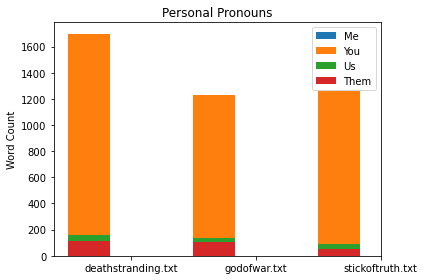

In [7]:
me_id = vocabulary.index('me')
you_id = vocabulary.index('you')
us_id = vocabulary.index('us')
them_id = vocabulary.index('them')

me_counts = document_term_matrix[:, me_id]
you_counts = document_term_matrix[:, you_id]
us_counts = document_term_matrix[:, us_id]
them_counts = document_term_matrix[:, them_id]
print("Me:  " + str(me_counts))
print("You:  " + str(you_counts))
print("Us:  " + str(us_counts))
print("Them  " + str(them_counts))

import matplotlib.pyplot as plt

x = np.arange(len(titles))
width = 1/(len(titles))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, me_counts, width, label="Me")
rects2 = ax.bar(x - width, you_counts, width, label="You")
rects3 = ax.bar(x - width, us_counts, width, label="Us")
rects4 = ax.bar(x - width, them_counts, width, label="Them")

ax.set_ylabel("Word Count")
ax.set_title("Personal Pronouns")
ax.set_xticks(x)
ax.set_xticklabels(titles)
ax.legend()

fig.tight_layout()

plt.show()

In [8]:
def euclidean_distance(a, b):
    """Compute the Euclidean distance between two vectors.

    Note: ``numpy.linalg.norm(a - b)`` performs the
    same calculation using a slightly faster method.

    Arguments:
        a (numpy.ndarray): a vector of floats or ints.
        b (numpy.ndarray): a vector of floats or ints.

    Returns:
        float: The euclidean distance between vector a and b.

    Examples:
        >>> import numpy as np
        >>> a = np.array([1, 4, 2, 8])
        >>> b = np.array([2, 1, 4, 7])
        >>> round(euclidean_distance(a, b), 2)
        3.87

    """
    return np.sqrt(np.sum((a - b) ** 2))
vectors = []
for x in range(0, len(titles)):
    vectors.append([you_counts[x], them_counts[x]])
    
for x in range(0, len(vectors)):
    for y in range(x+1, len(vectors)):
        comparison = euclidean_distance(np.array(vectors[x]), np.array(vectors[y]))
        print(f'{titles[x]} vs {titles[y]}: {comparison}')

deathstranding.txt vs godofwar.txt: 471.1793713650885
deathstranding.txt vs stickoftruth.txt: 445.6197930972097
godofwar.txt vs stickoftruth.txt: 59.16924876994806
